## Importing KTK Library

In [328]:
import kineticstoolkit as ktk
import numpy as np
import matplotlib.pyplot as plt

## Reading c3d file using method read_c3d and Exploring the TimeSeries, Points and Analogs

It provides all the data in the c3d file. This type of data comes up with 2 TimeSeries, Points (where it stores the motion data) and Analogs (where it stores the analog data, such as EMG, force plate)

In [329]:
# Reading the c3d file
c3d_contents = ktk.read_c3d('Squat_2_0001.c3d', convert_point_unit=True)
c3d_contents

{'Points': TimeSeries with attributes:
          time: <array of shape (2612,)>
          data: <dict with 31 entries>
     time_info: {'Unit': 's'}
     data_info: <dict with 31 entries>
        events: [],
 'Analogs': TimeSeries with attributes:
          time: <array of shape (26120,)>
          data: <dict with 58 entries>
     time_info: {'Unit': 's'}
     data_info: <dict with 58 entries>
        events: []}

## Exploring the 'Points' TimeSeries

In [330]:
pt_info = c3d_contents["Points"] # Getting all the info for 'Points' TimeSeries
mrkrs_info = pt_info.data_info # Exploring all the markers' name
mrkrs_data = pt_info.data # Exploring all the markers' position data
mrkrs_data['SIAS_left']

array([[1.69340796, 0.435349  , 1.02383026, 1.        ],
       [1.69345178, 0.43535556, 1.02382135, 1.        ],
       [1.69352173, 0.43533313, 1.02384833, 1.        ],
       ...,
       [1.68440186, 0.50153577, 1.01687061, 1.        ],
       [1.68465381, 0.50135327, 1.01685162, 1.        ],
       [1.68492529, 0.50110745, 1.01684814, 1.        ]])

## Exploring the 'Analogs' TimeSeries

In [331]:
alg_info = c3d_contents["Analogs"]
alg_dataInfo = alg_info.data_info
alg_data = alg_info.data
alg_data
# alg_data['EMG1_RectFem_L'] # Example extracting EMG data from Rectus Femoris Left

{'AnkleForce': array([ 1.96383521e-01,  8.65183324e-02,  3.58581990e-02, ...,
        -1.52543187e-04, -6.56123459e-03, -1.60226375e-02]),
 'LoadCell': array([-0.07987785,  0.04890823, -0.04997063, ..., -0.0295229 ,
        -0.03562641, -0.02494526]),
 'EMG1_RectFem_L': array([-0.00047607, -0.00078125, -0.00108643, ..., -0.00993652,
        -0.00108643, -0.01420898]),
 'EMG2_RectFem_R': array([ 0.00717163,  0.00839233, -0.00106812, ...,  0.00991821,
        -0.00106812, -0.00869751]),
 'EMG3_Semitend_L': array([ 0.00688477,  0.0102417 ,  0.00932617, ...,  0.00932617,
        -0.01203613, -0.01813965]),
 'EMG4_Semitend_R': array([-0.01785278,  0.00076294,  0.04898167, ...,  0.01358032,
         0.00564575,  0.0062561 ]),
 'EMG5_Gastroc_L': array([ 0.00327154, -2.31182718, -1.47593832, ...,  0.40641448,
         2.48652506,  1.04943037]),
 'EMG6_Gastroc_R': array([ 0.01552124,  0.00728149, -0.01957398, ...,  0.01460571,
         0.05397434,  0.06740208]),
 'EMG7_TibAnt_L': array([-0.0032

## Extracting data from each TimeSeries
We extract the marker data of left anterior superior spina iliaca (lasis). There are two ways to extract the data from the c3d file
First, we can use the dictionary and index/find the suitable dataset
Second, we can use the get_subset method from the kinetics tool kit
However, there are drawbacks from each methods. If we use the first method, we can adjust our data extraction but we cannot directly use .plot() method as the data type does not have the this attribute. Using method two, we can directly plot our data for visualisation, but we cannot adjust our data, we will get and plot all the data in the dictionary

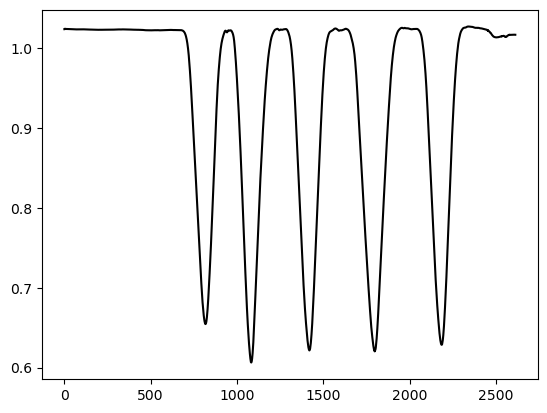

In [332]:
# Using the first method - indexing
lasis_marker = mrkrs_data["SIAS_left"][:,2]
plt.plot(lasis_marker,'k-') # We can see that this is the data we need to find information when a subject performed squat exercise
# lasis_marker.plot() # We cannot directly plot for visualisation but we can adjust our data to our needs

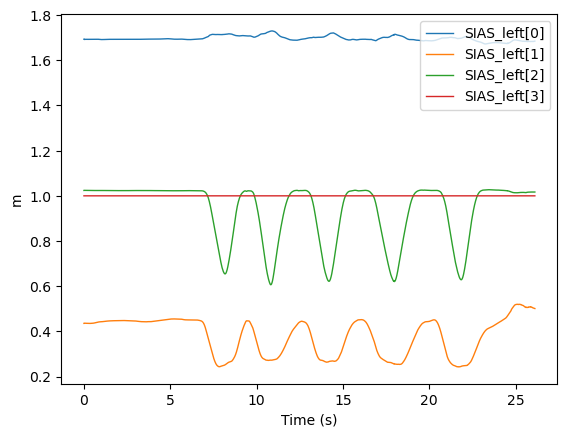

In [333]:
# We compare with method two - using the get_subset() attribute/method
lasis_marker_subset = pt_info.get_subset(["SIAS_left"]) # Now this is a TimeSeries data which has the plot() attribute
lasis_marker_subset.plot() # However, we can see that if we plot, it'll plot all the SIAS_left markers. I haven't found the way to extract one set of data

## Now we extract the EMG data of left rectus femoris muscle
Since the EMG data has only one data set, it's better to use .get_subset() attribute, so we can directly plot

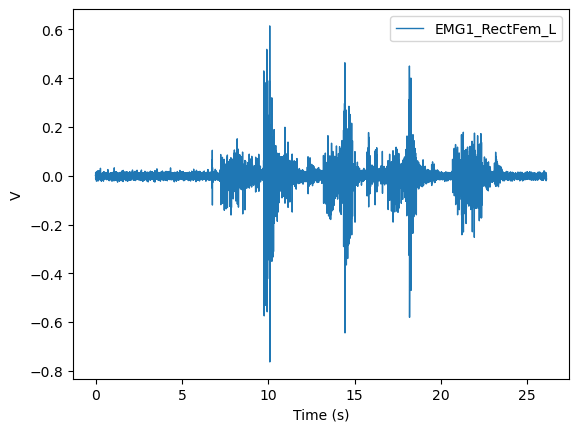

In [334]:
# Extracting the EMG data of the left rectus femoris muscle
rectusFemoris_L = alg_info.get_subset(["EMG1_RectFem_L"])
rectusFemoris_L.plot()


## Since the sampling frequency between the motion and the analog data, we need to synchronise them so that we obtain useful data
Before we synchronise the data, we need to filter the EMG signal with the bandpass filter from the ktk library
ktk.filters.butter(signal_input, btype='bandpass, cut_off freq=[])

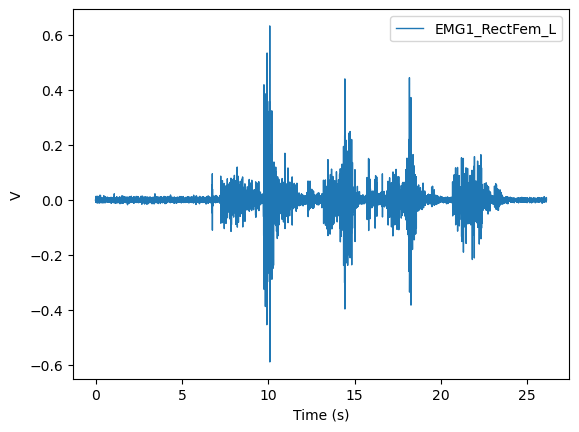

In [335]:
# Filtering the EMG signal with band-pass filter with cut-off frequency of 10 Hz and 80 Hz
rectusFemoris_L_filtered = ktk.filters.butter(rectusFemoris_L, btype="bandpass", fc=[20, 200])
rectusFemoris_L_filtered.plot()

## Rectifying the filtered signal to flip the negative sign
Normally, the np.abs() is used to eliminate the negative-valued signal

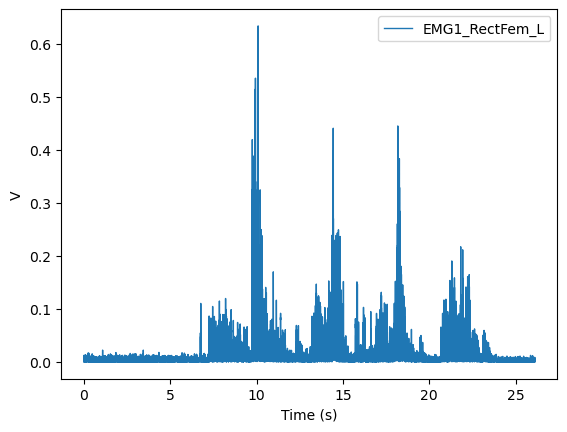

In [336]:
# Rectifying the filtered signal
rectusFemoris_L_filtered.data["EMG1_RectFem_L"] = np.abs(rectusFemoris_L_filtered.data["EMG1_RectFem_L"])
rectusFemoris_L_filtered.plot()

## We again filter the signal with low-pass filter with cut-off frequency of 10 Hz
We also create an envelope EMG signal and plot it together with the filtered signal

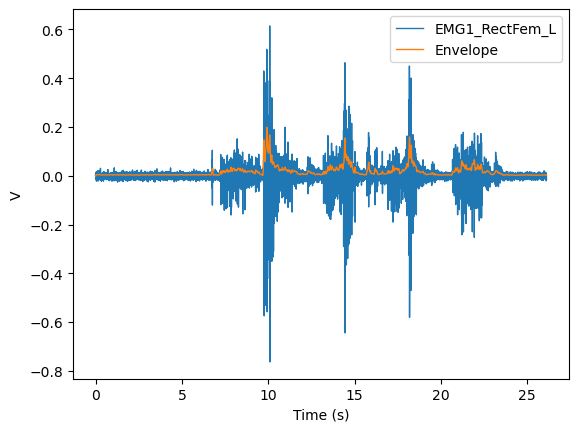

In [337]:
rectusFemoris_L_filtered = ktk.filters.butter(rectusFemoris_L_filtered, fc=10)
rectusFemoris_L_filtered = rectusFemoris_L_filtered.rename_data("EMG1_RectFem_L", "Envelope")
rectusFemoris_L = rectusFemoris_L.merge(rectusFemoris_L_filtered)
rectusFemoris_L.plot()
